In [316]:
import pandas as pd
import numpy as np
import re

In [367]:
import csv
def convert_to_csv(pathfile,newpathfile):
    with open(pathfile, 'r') as dat_file:
        with open(newpathfile, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            for row in dat_file:
                row = [value.strip() for value in row.split('|')]
                print(row)
                csv_writer.writerow(row)

### breast-w Dataset

In [318]:
convert_to_csv('./data/breast_w/breast-cancer-wisconsin.data','./data/breast_w/breast_w.csv')
df_breast_w=pd.read_csv('./data/breast_w/breast_w.csv',header=None).drop(columns=0).rename({1:"clump_thickness",2:"uniformity_of_cell_size",3:"uniformity_of_cell_shape",4:"marginal_adhension",5:"single_epithelial_cell_size",6:"bare_nuclei",7:"bland_chromatin",8:"normal_nucleoli",9:"mitoses",10:"class"},axis=1).reset_index(drop=True)
df_breast_w.to_csv('./data/breast_w/clean_breast_w.csv')

### Tic-Tac-Toe

In [319]:
convert_to_csv('./data/tic_tac_toe/tic-tac-toe.data','./data/tic_tac_toe/tic-tac-toe.csv')
df_ttt=pd.read_csv('./data/tic_tac_toe/tic-tac-toe.csv',header=None).rename({0:"top-left",1:'top-middle',2:'top-right',3:'middle-left',4:'middle-middle',5:'middle-right',6:'bottom-left',7:'bottom-middle',8:'bottom-right',9:'class'},axis=1).dropna().reset_index(drop=True)
df_ttt.to_csv('./data/tic_tac_toe/clean_tic-tac-toe.csv')


### Iris Dataset

In [320]:
convert_to_csv('./data/iris/bezdekIris.data','./data/iris/iris.csv')
df_iris = pd.read_csv('./data/iris/iris.csv',header=None).rename({0:'sepal length',1:'sepal width',2:'petal length',3:'petal width',4:'class'},axis=1).dropna().reset_index(drop=True)
df_iris.to_csv('./data/iris/clean_iris.csv')

### Hepatitis Data

In [330]:
convert_to_csv('./data/hepatitis/hepatitis.data','./data/hepatitis/hepatitis.csv')
df_hepatitis=pd.read_csv('./data/hepatitis/hepatitis.csv',header=None).rename({0:'class',1:'age',2:'sex',3:'steroid',4:'antivirals',5:'fatigue',6:'malaise',7:'anorexia',8:'big liver',9:'firm liver',10:'palpable spleen',11:'spiders',12:'ascites',13:'varices',14:'bilirubin',15:'phosphate',16:'sgot',17:'albumin',18:'protime',19:'histology'},axis=1)
df_hepatitis=df_hepatitis.replace('?',np.nan).dropna()
df_hepatitis['phosphate']=df_hepatitis['phosphate'].astype('int')
df_hepatitis['sgot']=df_hepatitis['sgot'].astype('int')
df_hepatitis['albumin']=df_hepatitis['albumin'].astype('float')
df_hepatitis['protime']=df_hepatitis['protime'].astype('float')
df_hepatitis['bilirubin']=df_hepatitis['bilirubin'].astype('float')

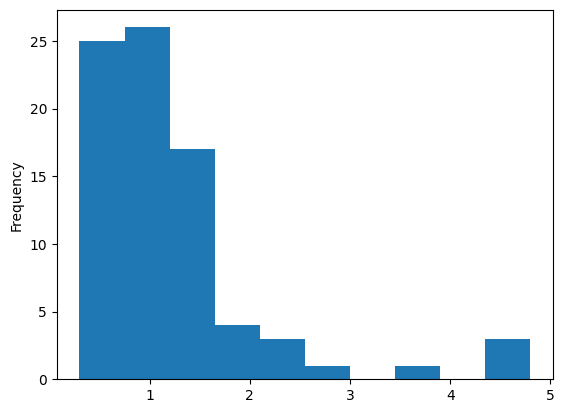

In [331]:
df_hepatitis['bilirubin'].plot.hist()

# Discretising into bins
bins=[-np.inf,0.5,1,1.5,2,np.inf]
labels=['0-0.5','0.5-1','1-1.5','1.5-2','2 & Above']
df_hepatitis['bilirubin']=pd.cut(df_hepatitis['bilirubin'],bins=bins,labels=labels)

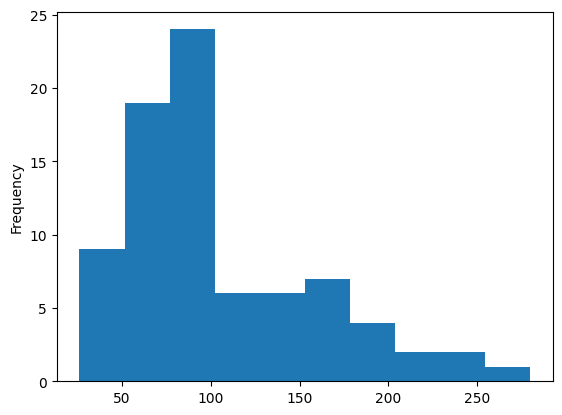

In [332]:
df_hepatitis['phosphate'].plot.hist()
#Discretising into bins
bins=[0,50,100,150,200,250,np.inf]
labels=['0-50','50-100','100-150','150-200','200-250','250 & Above']
df_hepatitis['phosphate']=pd.cut(df_hepatitis['phosphate'],bins=bins,labels=labels)

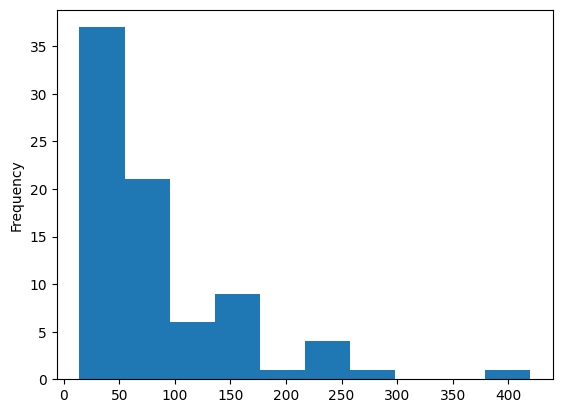

In [333]:
df_hepatitis['sgot'].plot.hist()

#Discretising into bins
bins=[0,100,200,300,np.inf]
labels=['0-100','100-200','200-300','300 & Above']
df_hepatitis['sgot']=pd.cut(df_hepatitis['sgot'],bins=bins,labels=labels)


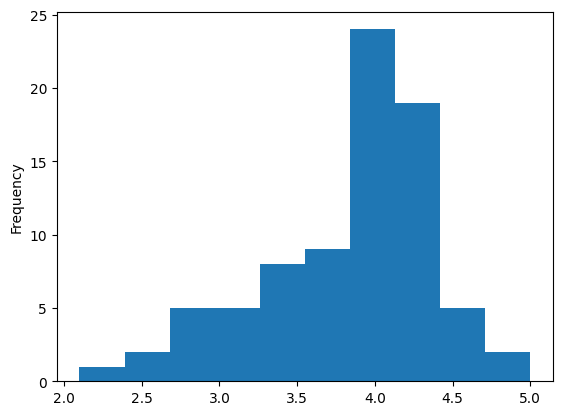

In [334]:
df_hepatitis['albumin'].plot.hist()
#Discretising into bins
bins=[2,2.5,3,3.5,4.0,4.5,5]
labels=['2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
df_hepatitis['albumin']=pd.cut(df_hepatitis['albumin'],bins=bins,labels=labels)

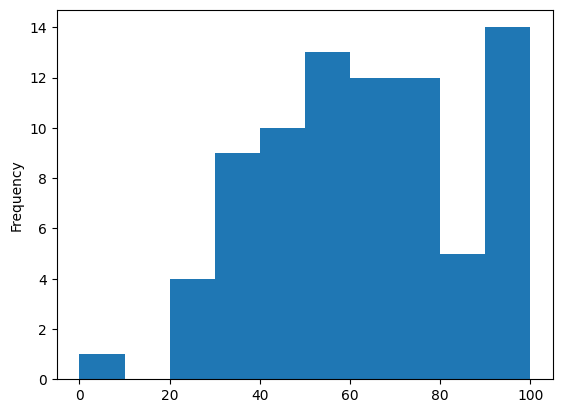

In [335]:
df_hepatitis['protime'].plot.hist()

#Discretising into bins
bins=[0,20,40,60,80,100]
labels=['0-20','20-40','40-60','60-80','80-100']
df_hepatitis['protime']=pd.cut(df_hepatitis['protime'],bins=bins,labels=labels)
df_hepatitis.to_csv('./data/hepatitis/clean_hepatitis.csv')


### German Data

In [409]:
df_german=pd.read_csv('./data/german/german.data',header=None)
df_german.columns=['status_of_existing_checking_account duration_(months) credit_history purpose credit_amount savings_account/bonds present_employment_since installment_rate personal_status_sex other_debtors present_residence property age other_installment_plans housing number_of_existing_credits job no._of_people_being_liable_to_provide_maintenance telephone foreign_worker class']
df_german[df_german.columns[0].split(' ')] = df_german.iloc[:,0].str.split(' ', expand=True)
df_german.drop(df_german.columns[0], axis=1, inplace=True)


In [410]:
df_german['age']=df_german['age'].astype('int')
df_german['duration_(months)']=df_german['duration_(months)'].astype('int')
df_german['credit_amount']=df_german['credit_amount'].astype('int')

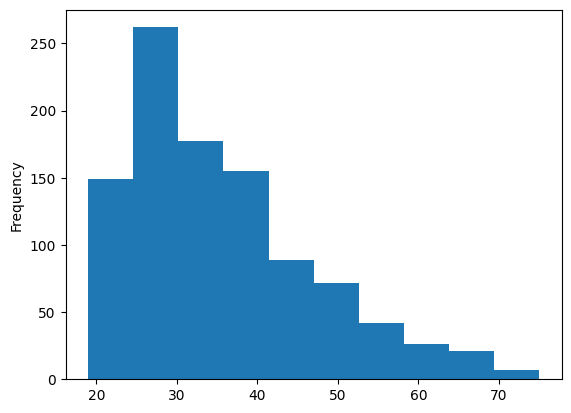

In [411]:
df_german['age'].plot.hist()

# Discretising into bins
bins=[10,20,30,40,50,60,70,80]
labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80']
df_german['age']=pd.cut(df_german['age'],bins=bins,labels=labels)

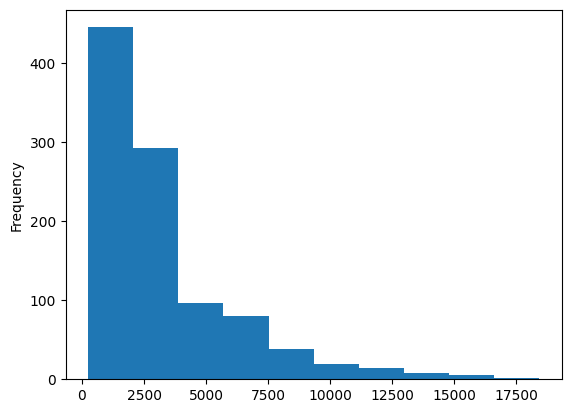

In [412]:
df_german['credit_amount'].plot.hist()

# Discretising into bins
bins=[0,2500,5000,7500,10000,12500,15000,17500,20000]
labels=['0-2500','2500-5000','5000-7500','7500-10000','10000-12500','12500-15000','15000-17500','17500-20000']
df_german['credit_amount']=pd.cut(df_german['credit_amount'],bins=bins,labels=labels)

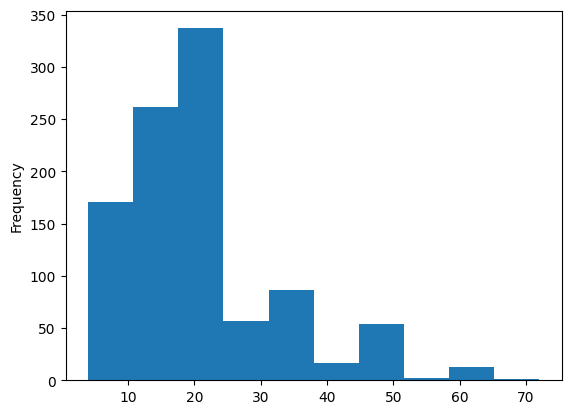

In [413]:
df_german['duration_(months)'].plot.hist()

bins=[0,10,20,30,40,50,60,70,80]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
df_german['duration_(months)']=pd.cut(df_german['duration_(months)'],bins=bins,labels=labels)

In [414]:
df_german=df_german.dropna().reset_index(drop=True)
df_german.to_csv('./data/german/clean_german.csv')